# Libraries

In [1]:
using Pkg
Pkg.add("Rotations");

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [6]:
using Images, ImageMetadata, ImageView, TestImages, CoordinateTransformations, Rotations

Gtk-Message: 15:27:37.816: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:27:37.816: Failed to load module "canberra-gtk-module"


In [3]:
pwd()

"/home/cesar/Python_NBs/OpenCV/Julia_CVision_V1.8"

# Read / Save images

## a) Reading images from disk
This is done using the `load(image_path)` function

In [8]:
# To avoid using wrong paths, we can implement a checkpoint.
image_path = "Images/robot.jpg"

function test_image_path(image_path)
    if isfile(image_path)
        print("This is a file!");
    else
        @info "ERROR: This path leads nowhere!"
    end
end

test_image_path(image_path)

This is a file!

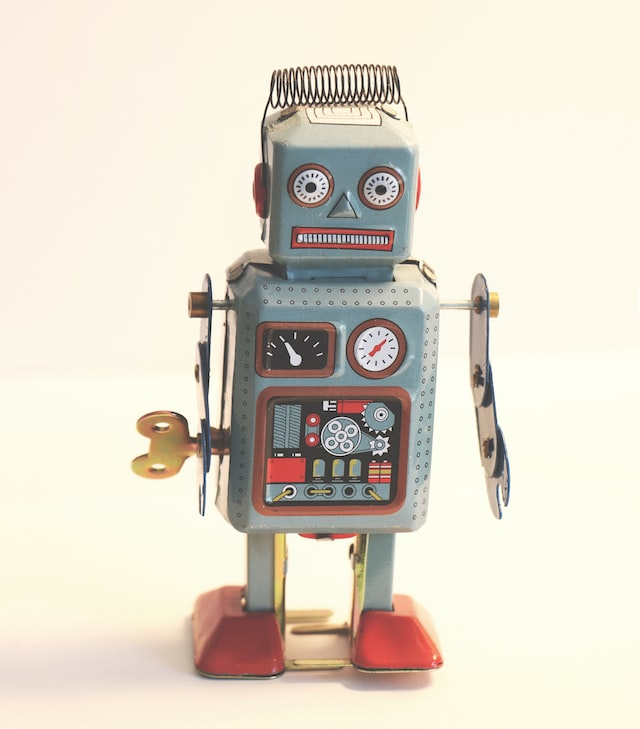

In [7]:
img = load(image_path)

## b) Reading images from URL
This process consists of 2 steps:
1. Download to disk image from url.
2. Read as normal.

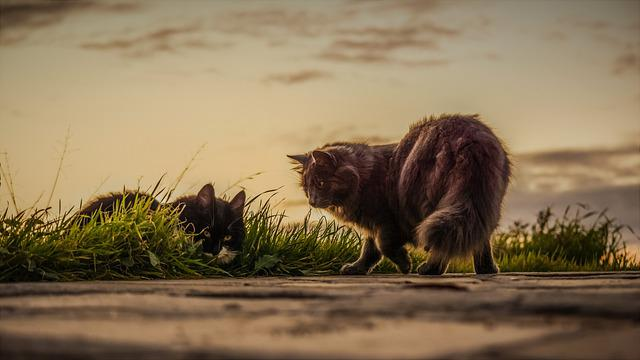

In [6]:
url = "https://cdn.pixabay.com/photo/2018/01/04/18/58/cats-3061372_640.jpg?attachment"
download_file_location_and_name = "Images/cats.jpg"
download_file = download(url, download_file_location_and_name)

image_url = load(download_file_location_and_name)

_Copyright notice: Pixabay provides images under CCO Creative Commons. They are free for commercial use and no attributions are required._

## c) Reading multiple images in a folder

In [7]:
# read directory with images
directory_path = "Hands-On-Computer-Vision-with-Julia/sample-images";

# "readdir" is used to read all the files names in a directory.
directory_files = readdir(directory_path);
directory_images = filter(x -> occursin(r"\.(jpg|png|gif){1}$"i, x), directory_files);

for image_name in directory_images
    image_path = joinpath(directory_path, image_name);
    image = load(image_path);
    
    # other operations
    # ...
    
end

## c) Reading a Test image

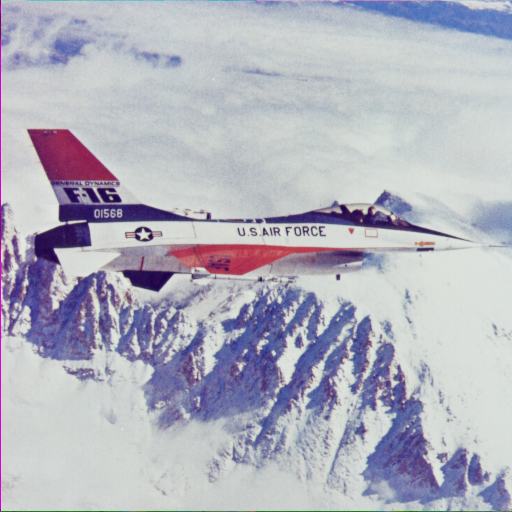

In [8]:
using TestImages
test = testimage("airplaneF16")

## d) Saving an image

In [9]:
# save file in JPG format
save("Images/airplaneF16.jpg", test)
 
# save file in PNG format
save("Images/airplaneF16.png", test)

## e) Preview images from folder

In [10]:
img = load("Images/robot.jpg");
imshow(img)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>Observables.ObserverFunction[Obs…
  "annotations" => Observable{Dict{UInt64, Any}} with 1 listeners. Value:…
  "clim"        => Observable{CLim{RGB{Float64}}} with 4 listeners. Value:…

# Simple image operations
Images are vertical major. This means that the first index corresponds to the height. The second index corresponds to the width. 

This may be different from different programming languages.

In [11]:
source_image = image_url;

In [12]:
# Image size (height, width)
size(source_image)

(360, 640)

## a) Crop

In [13]:
cropped_image = source_image[100:290, 280:540]; # (height, width)
# Alternative
# cropped_image_view = view(source_image, 100:290, 280:540); # (height, width)
imshow(cropped_image)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>Observables.ObserverFunction[Obs…
  "annotations" => Observable{Dict{UInt64, Any}} with 1 listeners. Value:…
  "clim"        => Observable{CLim{RGB{Float64}}} with 4 listeners. Value:…

## b) Resize

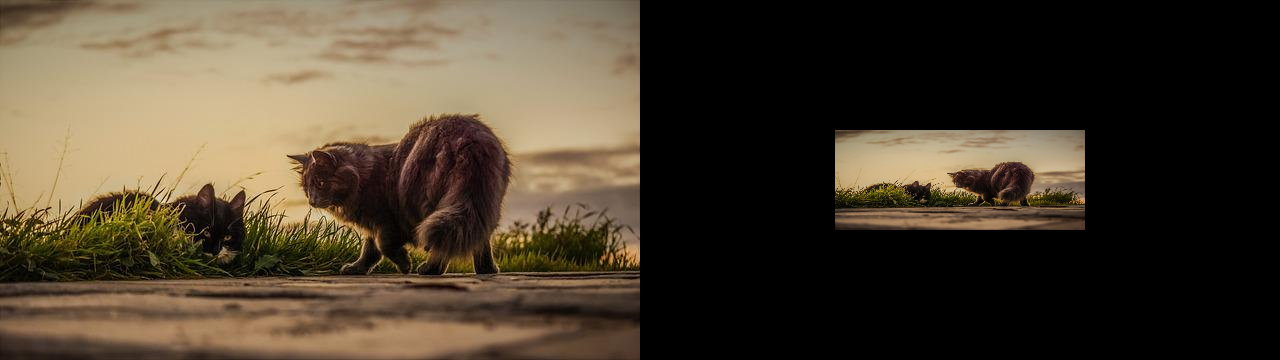

In [14]:
# resize an image
resized_image = imresize(source_image, (100, 250)); # (height, width)

mosaicview(source_image, resized_image; nrow = 1)

## c) Scale

### c.1) Scale an image by percentage (keeping same aspect ratio)

Original size: (360, 640)
New size:      (216, 384)


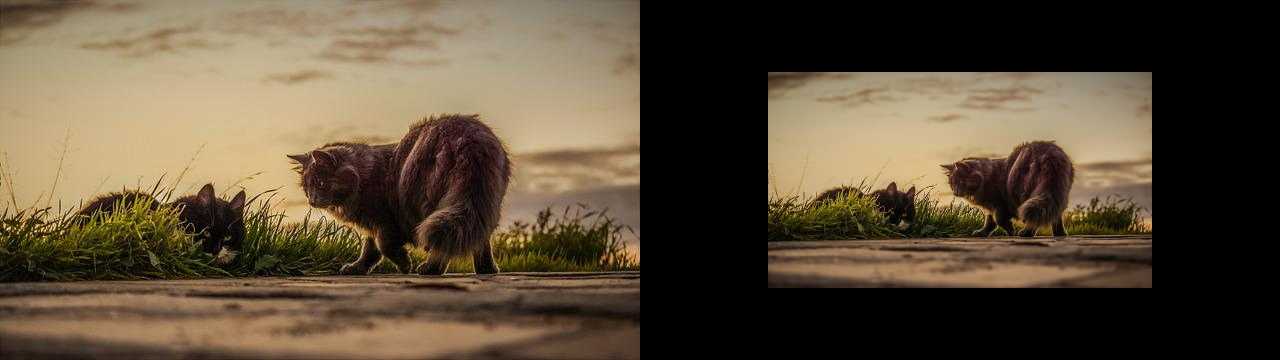

In [15]:
# Percentage to keep
scale_percentage = 0.6

# Original size
#imshow(source_image);
println("Original size: ", size(source_image))

# We calculate new_size by:
# 1. Multiply current size by our proportion.
# 2. Convert float values to int.
new_size = trunc.(Int, size(source_image) .* scale_percentage)
println("New size:      ", new_size)

scaled_image = imresize(source_image, new_size)
#imshow(resized_image);

mosaicview(source_image, scaled_image; nrow = 1)

### c.1) Scale an image to a specific dimension
You may want to scale an image to an specific width and the height to be adapted accordingly.

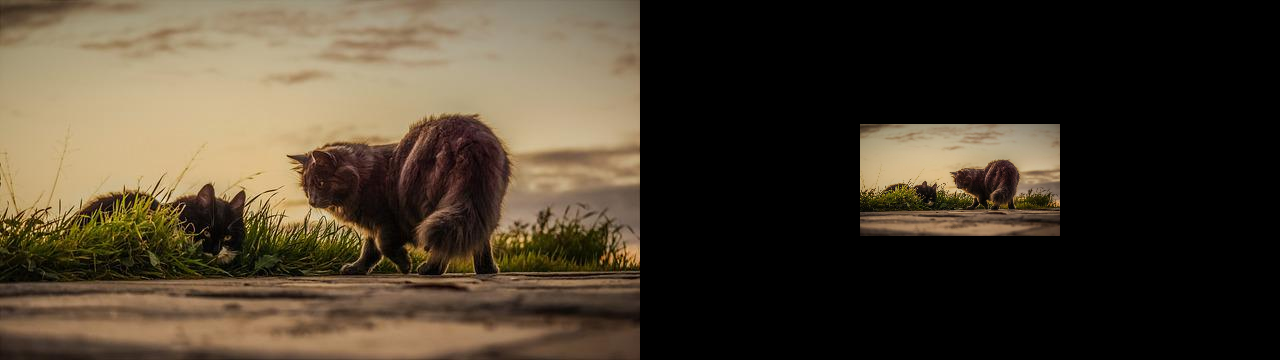

In [16]:
new_width = 200

scale_percentage = new_width / size(source_image)[2]

# We calculate new_size by:
# 1. Multiply current size by our proportion.
# 2. Convert float values to int.
new_size = trunc.(Int, size(source_image) .* scale_percentage)

scaled_image_dimension = imresize(source_image, new_size)

mosaicview(source_image, scaled_image_dimension; nrow = 1)

### c.3) Scale/ resize image by two-fold with restrict(img, option)
It scales the image by 50%. It can be run 3 ways depending on the selected option: 

* a) [Empty]: Default resizing will become twice as small in width and height. 
* b) 1: Height is twice as small 
* c) 2: Width is twice as small

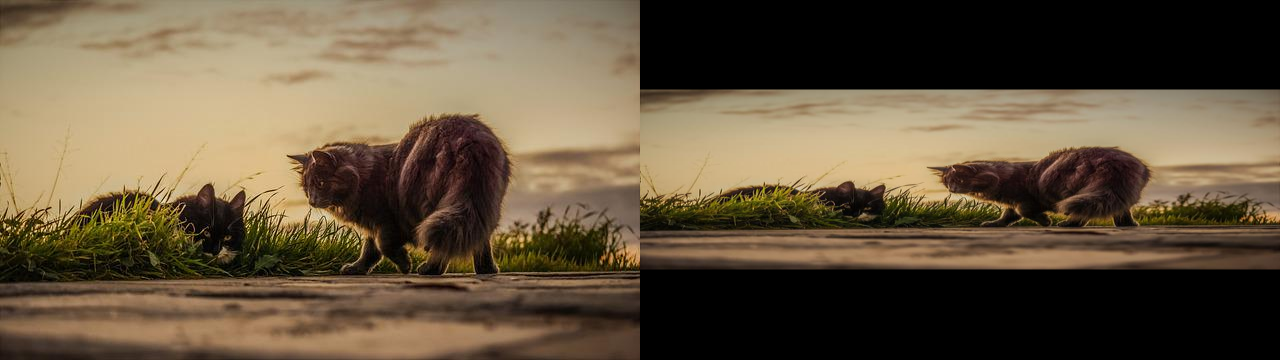

In [17]:
resized_image_twofold = restrict(source_image, 1); # height

mosaicview(source_image, resized_image_twofold; nrow = 1)

# Rotating Images

In [18]:
img_rotated = image_url;

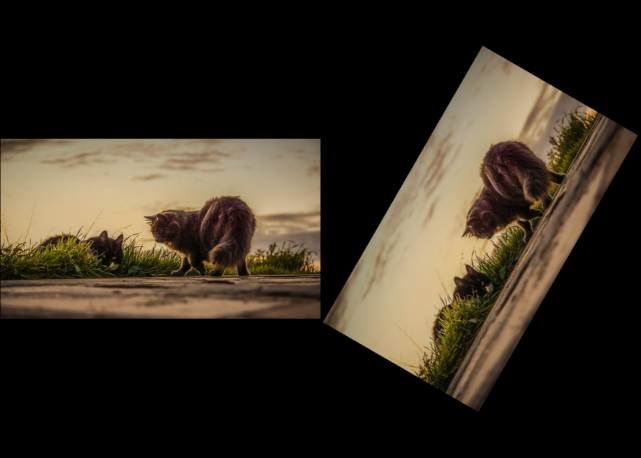

In [19]:
tf_matrix = LinearMap(RotMatrix(-π/3)) # rotate by -60 degrees 
img_rotated = warp(img_rotated, tf_matrix)

mosaicview(source_image, img_rotated; nrow = 1)

# Sources
* [Julia v1.7 Release Notes](https://github.com/JuliaLang/julia/blob/57ce0e66e9490dcfa01e1e1789fc07bdcac157be/HISTORY.md)